# 회귀분석과 시각화


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.datasets import load_boston
import statsmodels.api as sm

- 보스턴 주택가격 데이터 설명
    - The dataset contains a total of 506 cases.
    - The data was originally published by Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.
- 변수
    - 1개의 반응변수 y : Price
    - 4개의 설명변수 X : RM, NOX, AGE, LSTAT
    - PRICE	: 주택 가격
    - RM	: 주택 1가구당 평균 방의 개수
    - NOX	: 10ppm 당 농축 일산화질소
    - AGE	: 1940년 이전에 건축된 소유주택의 비율
    - LSTAT : 하위계층의 비율(%)
- 데이터 특이사항
    - Variable #14 seems to be censored at 50.00 (corresponding to a median price of $50,000); Censoring is suggested by the fact that the highest median price of exactly $50,000 is reported in 16 cases, while 15 cases have prices between $40,000 and $50,000, with prices rounded to the nearest hundred. Harrison and Rubinfeld do not mention any censoring.


In [2]:
from sklearn import datasets
X,y = datasets.fetch_openml('boston', return_X_y=True)
boston = pd.concat([y,X], axis = 1)
boston.head()

c:\Users\User\anaconda3\envs\tf2\lib\site-packages\sklearn\datasets\_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(


,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [3]:
boston_df = boston[["MEDV", "RM", "NOX", "AGE", "LSTAT"]]
boston_df.rename(columns={"MEDV":"PRICE"}, inplace=True)
boston_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_15212\1765092161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_df.rename(columns={"MEDV":"PRICE"}, inplace=True)


,PRICE,RM,NOX,AGE,LSTAT
0,24.0,6.575,0.538,65.2,4.98
1,21.6,6.421,0.469,78.9,9.14
2,34.7,7.185,0.469,61.1,4.03
3,33.4,6.998,0.458,45.8,2.94
4,36.2,7.147,0.458,54.2,5.33


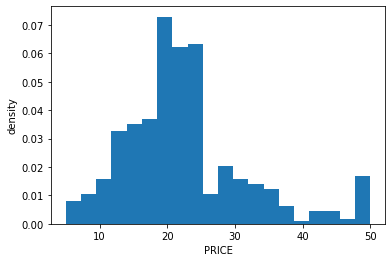

In [4]:
# 반응변수와 각 설명변수들의 히스토그램 확인
plt.hist(boston_df['PRICE'], bins=20, density=True)
plt.xlabel('PRICE')
plt.ylabel('density')
plt.show()

레이아웃을 만들어서 네개 변수 히스토그램을 그려보자.

NameError: name 'var_name' is not defined

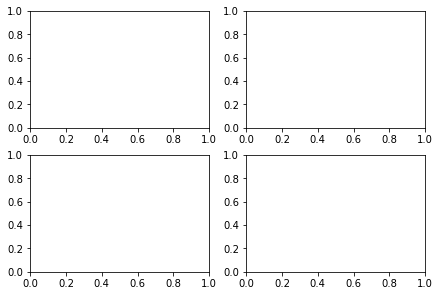

In [5]:
fig, ax = plt.subplots(2,2, layout='constrained')
for i, ax in enumerate(ax.flat):
    v=var_name[i]
    ax.hist(boston_df[v], bins=20, density=True)
    ax.set_xlabel(v)
    ax.set_ylabel('density')

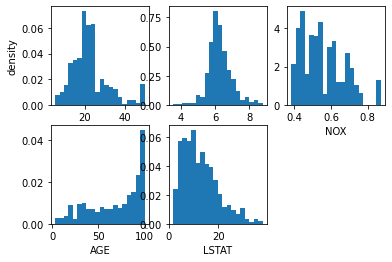

In [ ]:
# 좀 더 간단한 표현
boston_df.columns
for i, col in enumerate(boston_df.columns):
    ax = plt.subplot(2, 3, i + 1)

    plt.hist(boston_df[col], bins=20, density=True)
    plt.xlabel(col)
    # plt.ylabel('density')

    if i==0:
        plt.ylabel('density')

다중회귀모형 적합을 통해서 적합된 결과의 회귀계수 테이블을 확인하여 계수의 유의성, 모형 적합도 등 확인해봅시다.


In [ ]:
model = sm.OLS.from_formula("PRICE ~ RM+NOX+AGE+LSTAT", data=boston_df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     223.2
Date:                Fri, 03 Feb 2023   Prob (F-statistic):          8.13e-110
Time:                        10:19:42   Log-Likelihood:                -1581.4
No. Observations:                 506   AIC:                             3173.
Df Residuals:                     501   BIC:                             3194.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5415      3.398      0.159      0.8

predict 함수를 이용하여 y_hat 적합값을 도출하고  y_true과 함께 mse를 계산할 수 있습니다

In [ ]:
y_hat = result.predict(boston_df.loc[:, boston_df.columns != 'PRICE'])
y_true = boston_df['PRICE']
y_resi = y_true - y_hat
mse = round((y_resi ** 2).mean(), 3)
print(mse)

30.349


실제로 데이터 값을 통해서 반응변수와 각 설명변수간의 산점도를 확인할 수 있습니다. 산점도를 통해 어떤 두 변수의 상관관계를 시각화해 봅시다.


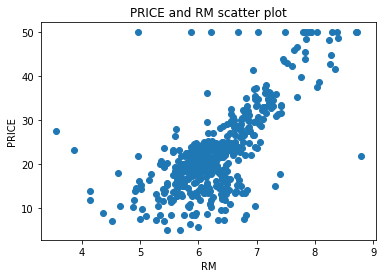

In [ ]:
plt.scatter(boston_df['RM'], boston_df['PRICE'])
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.title('PRICE and RM scatter plot')
plt.show()

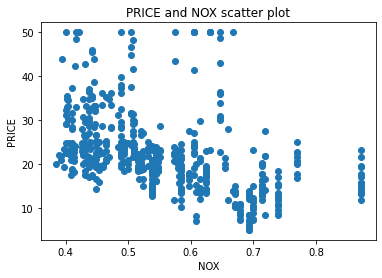

In [ ]:
plt.scatter(boston_df['NOX'], boston_df['PRICE'])
plt.xlabel('NOX')
plt.ylabel('PRICE')
plt.title('PRICE and NOX scatter plot')
plt.show()

위 그림에서 데이터가 많이 겹쳐있는 것을 알 수 있습니다. 투명도와 점의 크기를 조절하는 것이 좋을 것 같습니다.

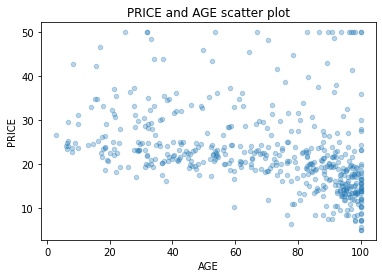

In [ ]:
plt.scatter(boston_df['AGE'], boston_df['PRICE'], alpha = 0.3, s = 20)
plt.xlabel('AGE')
plt.ylabel('PRICE')
plt.title('PRICE and AGE scatter plot')

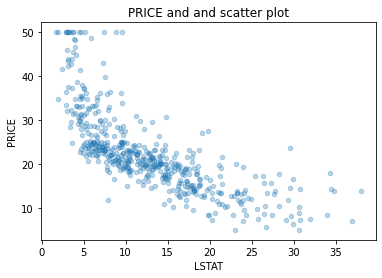

In [ ]:
plt.scatter(boston_df['LSTAT'], boston_df['PRICE'], alpha = 0.3, s = 20)
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.title('PRICE and and scatter plot')
plt.show()

- 모든 변수간의 산점도 행렬을 간단하게 시각화 > pairplot 활용합니다
- 대각원소에서 각 변수의 히스토그램 확인합니다
- 반응변수 PRICE가 정규분포의 모양임을 확인합니다
- 4개의 각 설명변수가 반응변수와의 상관 관계를 대략적으로 확인합니다


Senborn 패키지는 회귀분석에서 여러개 그림을 그리는 작업을 쉬운 코드로 작성할 수 있습니다. Seaborn 패키지는 6장에서 다시 다룹니다.

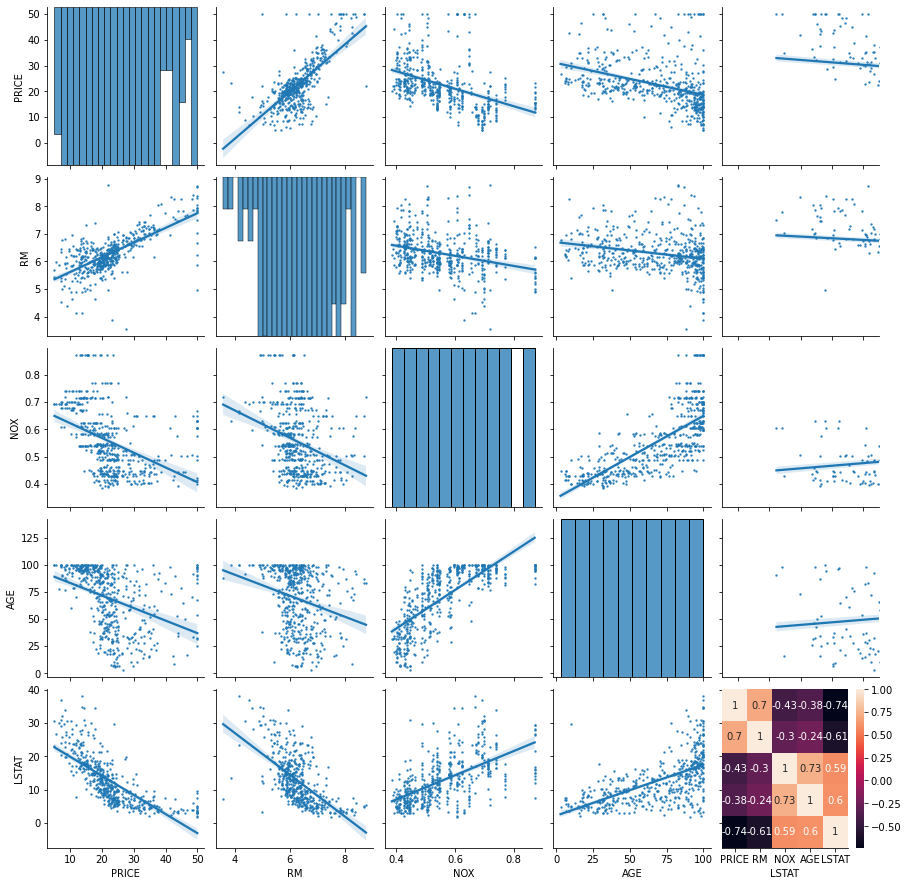

In [ ]:
# 히트맵을 시각화하여 변수간의 상관계수 확인
import seaborn as sns
g = sns.pairplot(boston_df, kind="reg", plot_kws=dict(scatter_kws=dict(s=2)))
g_heat = sns.heatmap(boston_df.corr(), annot=True)

이후에 편의상 단순회귀분석 적합을 하겠습니다.
- 반응변수 y : Price(주택 가격)
- 설명변수 X : RM(주택 1가구당 평균 방의 개수)


In [ ]:
model = sm.OLS.from_formula("PRICE ~ RM", data=boston_df)
result = model.fit()
print(result.summary())

Text(0, 0.5, 'y_resi')

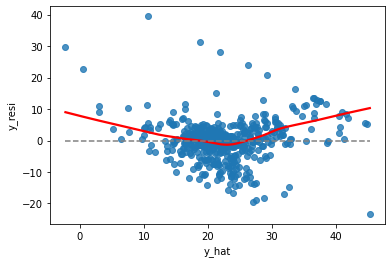

In [ ]:
#%%
# 잔차그림을 이용한 적합값(y_hat)과 잔차(y_resi)를 비교하여 모형의 선형성 확인
y_hat = result.predict(boston_df)
y_true = boston_df['PRICE']
y_resi = y_true - y_hat
sns.regplot(x = y_hat, y = y_resi, lowess=True, line_kws={'color' : 'red'})
plt.plot([y_hat.min(), y_hat.max()], [0, 0], '--', color='grey')
plt.xlabel('y_hat')
plt.ylabel('y_resi')

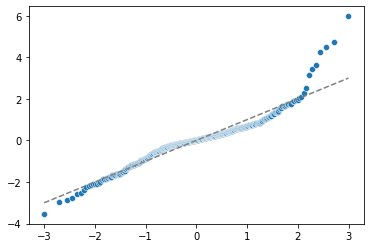

In [ ]:
# qqplot을 이용한 정규성 확인
import scipy.stats
standard_resi = scipy.stats.zscore(y_resi)
(x, y), _ = scipy.stats.probplot(standard_resi)
sns.scatterplot(x = x, y = y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

Text(0, 0.5, 'sqrt of standardized resid')

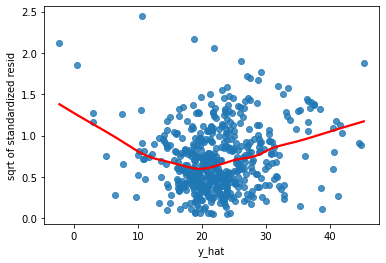

In [ ]:
#%%
# 잔차그림을 이용한 등분산성 검정
sns.regplot(x = y_hat, y = np.sqrt(np.abs(standard_resi)), lowess=True, line_kws={'color' : 'red'})
plt.xlabel('y_hat')
plt.ylabel('sqrt of standardized resid')